# 데이터 분할

- 머신러닝 모델의 성능을 정확하게 평가하기 위해서는 훈련에 사용하지 않은 테스트 세트를 통해 평가해야함
- 평가를 위한 별도의 데이터를 준비하거나 준비된 데이터 중에 일부를 떼어 테스트 세트로 준비
- 훈련 : 테스트 비율은 70 ~ 80 : 20 ~ 30
    - 반드시 정해져 있는 것은 아니며 연구자의 임의로 조절 가능함
    - 전체 데이터가 아주 크고 모든 데이터 패턴을 잘 담아내기만 한다면 테스트 데이터는 1%만 사용해도 충분할 수 있음

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("./data/Fish.csv")

In [6]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
df = df.loc[df["Species"].isin(["Bream", "Smelt"]), ["Species", "Weight", "Length2"]]

In [10]:
le = LabelEncoder()
df["label"] = le.fit_transform(df["Species"])

In [12]:
df.head()

,Species,Weight,Length2,label
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


In [14]:
df.shape

(49, 4)

In [16]:
df.tail()

,Species,Weight,Length2,label
154,Smelt,12.2,12.2,1
155,Smelt,13.4,12.4,1
156,Smelt,12.2,13.0,1
157,Smelt,19.7,14.3,1
158,Smelt,19.9,15.0,1


## 샘플링 편향

- 훈련 세트에 도미 데이터와 빙어 데이터가 골고루 들어가 있지 않다면 올바르게 분류할 수 없음
    - 예) 빙어 없이 모델 훈련이 이루어진다면 어떤 데이터를 빙어로 분류해야할지 알 수 없음
- 데이터가 골고루 섞여있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미로 샘플링 편향(sampling bias)이라고 부름

### train_test_split()

- 전달되는 리스트나 배열을 섞은 후 비율에 맞게 훈련 세트와 테스트 세트로 나누어 주는 함수
- random_state
    - 매번 코드를 실행할 때마다 다른 결과가 나온다면 정확하게 모델을 평가할 수 없고 모델 최적화에 어려움이 있음
    - 난수를 생성할 때 특정한 규칙으로 생성해서 매번 같은 결과가 나오게 통제할 수 있음
- stratify
    - 무작위로 데이터를 섞으면 샘플링 편향이 일어날 수 있기 때문에 기존 데이터의 비율과 같은 비율로 데이터를 나눌 수 있도록 할 수 있음

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df[["Length2", "Weight"]], 
                                                    df["label"],
                                                    test_size = 0.25, 
                                                    stratify = df["label"],
                                                    random_state = 26)

In [22]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

36 13 36 13


In [24]:
y_test

2      0
13     0
4      0
145    1
149    1
26     0
146    1
156    1
31     0
0      0
1      0
6      0
19     0
Name: label, dtype: int32

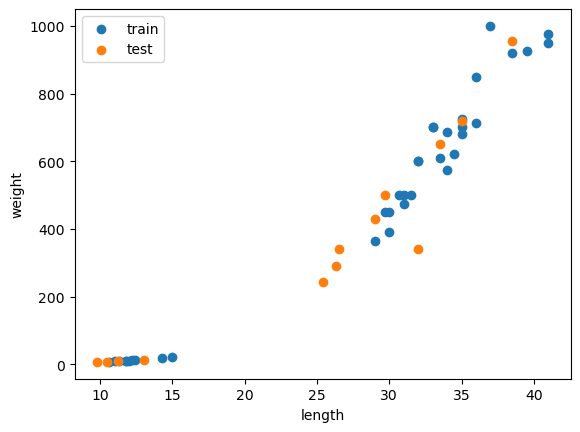

In [26]:
plt.figure()

plt.scatter(x_train["Length2"], x_train["Weight"], label = "train")
plt.scatter(x_test["Length2"], x_test["Weight"], label = "test")

plt.legend()
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 모델 훈련

In [29]:
# KNN 분류기 객체 생성
knn = KNeighborsClassifier()

In [31]:
# 훈련 데이터로 모델 학습
knn.fit(x_train, y_train)

KNeighborsClassifier()

# 모델 평가

In [34]:
knn.score(x_test, y_test)

1.0

# 모델 최적화

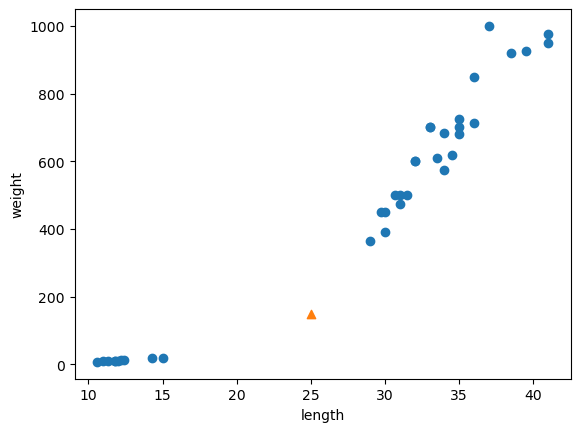

In [37]:
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [39]:
# 길이 25, 무게 150 물고기에 대한 예측
knn.predict([[25, 150]])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

- kneighbors()
    - 이웃까지의 거리와 이웃 샘플의 인덱스를 반환

In [42]:
# 25, 150 물고기와 가장 이웃한 데이터들
dist, idx = knn.kneighbors([[25, 150]])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


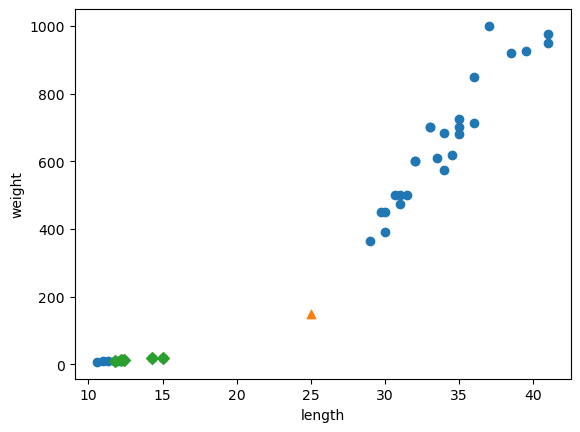

In [44]:
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")
plt.scatter(x_train.iloc[idx.flatten(), 0], x_train.iloc[idx.flatten(), 1], marker = "D")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [46]:
idx

array([[22, 11, 29,  9, 10]], dtype=int64)

In [48]:
x_train.iloc[idx.flatten()]

,Length2,Weight
158,15.0,19.9
157,14.3,19.7
155,12.4,13.4
154,12.2,12.2
151,11.8,10.0


In [50]:
y_train.iloc[idx.flatten()]

158    1
157    1
155    1
154    1
151    1
Name: label, dtype: int32

In [52]:
print(dist)

[[130.48375378 130.73859415 137.17988191 138.39320793 140.62090883]]


- x축은 범위가 좁고 y축은 범위가 넓기 때문에 y축으로 조금만 차이가 벌어져도 큰값으로 거리가 계산됨

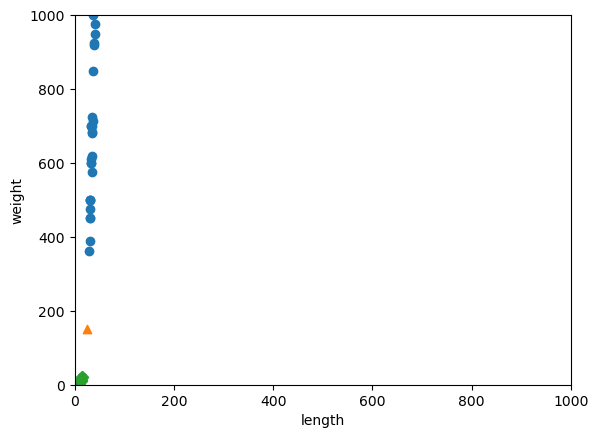

In [55]:
# x, y축을 동일 범위로 시각화
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = "^")
plt.scatter(x_train.iloc[idx.flatten(), 0], x_train.iloc[idx.flatten(), 1], marker = "D")

plt.xlim((0, 1000))
plt.ylim((0, 1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

- 시각화 자료를 참고하면 현재 데이터에서 생선의 길이는 모델이 값을 예측하는데에 거의 사용되지 않고 있음
    - 두 독립변수의 단위가 다르기 때문에
- knn은 특히 데이터 간 거리가 모델 성능에 영향을 많이 주는 특성이 있음
    - 각 독립변수의 단위가 다르면 올바른 예측이 어려울 가능성이 높음
- 각 독립변수의 단위를 일정한 기준으로 맞춰 주는 작업을 스케일링(scaling) 이라고 함

## 스케일링

- 스탠다드 스케일링(standard scaling)
    - 각 피처값이 평균에서 표준편차의 몇 배만큼 떨어져있는지를 나타내 데이터의 단위와 관계없이 동일한 조건으로 비교할 수 있게 변환
        - 분산 : 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 계산
        - 표준편차 : 분산의 제곱근. 데이터가 분산된 정도
    - 계산식
        - (특성값 - 평균) / 표준편차

In [59]:
# 스탠다드 스케일러 객체 생성
ss = StandardScaler()

In [61]:
scaled_x_train = ss.fit_transform(x_train)

In [63]:
scaled_x_train

array([[-1.63690796, -1.4323948 ],
       [ 1.13968178,  1.35290597],
       [-1.58767764, -1.42874713],
       [ 0.59814832,  0.28900193],
       [ 1.28737273,  1.50489226],
       [ 0.49968769,  0.66896766],
       [ 0.40122706,  0.36499508],
       [-1.56798552, -1.4290511 ],
       [ 0.30276643,  0.0610225 ],
       [-1.54829339, -1.42175576],
       [-1.58767764, -1.42844315],
       [-1.34152607, -1.39895781],
       [ 0.40122706,  0.36499508],
       [ 0.64737864,  0.42578959],
       [ 1.04122115,  1.33770734],
       [ 0.30276643, -0.01497065],
       [ 0.17476762, -0.0909638 ],
       [ 0.27322825,  0.0610225 ],
       [-1.66644615, -1.42935507],
       [ 0.54891801,  0.39539234],
       [ 0.79506958,  1.12492653],
       [ 0.35199675,  0.0610225 ],
       [-1.27260363, -1.39834987],
       [ 0.10584518, -0.35541994],
       [ 0.69660895,  0.66896766],
       [ 0.20430581, -0.0909638 ],
       [ 0.20430581, -0.27334734],
       [ 0.69660895,  0.60817314],
       [ 1.28737273,

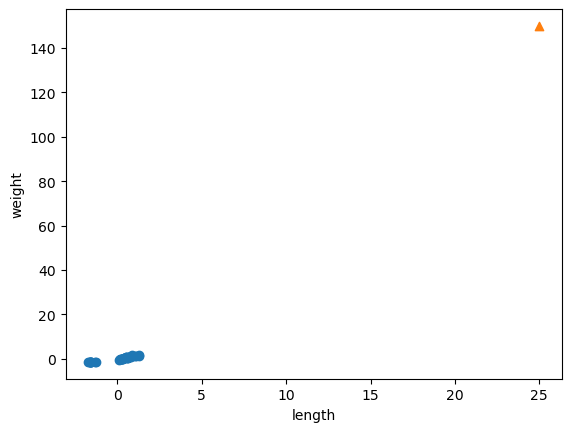

In [65]:
# 스케일링된 데이터 시각화
plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(25, 150, marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

- 값의 스케일이 달라졌기 때문에 테스트 데이터도 스케일링 해줘야 함

In [68]:
scaled_data = ss.transform([[25, 150]])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


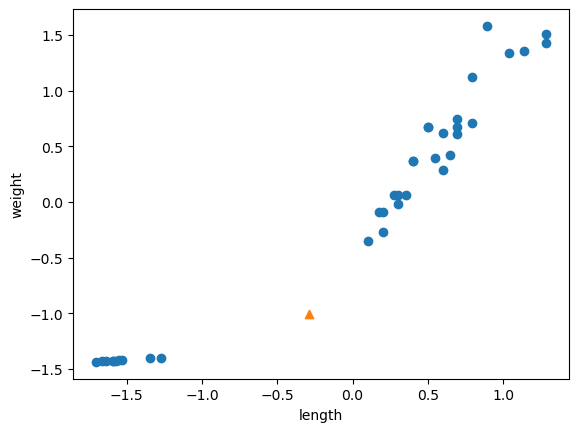

In [70]:
plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(scaled_data[0, 0], scaled_data[0, 1], marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [72]:
# 테스트 데이터 스케일링
scaled_x_test = ss.transform(x_test)

In [74]:
# 스케일링된 데이터로 다시 모델 훈련
knn = KNeighborsClassifier()
knn.fit(scaled_x_train, y_train)

KNeighborsClassifier()

In [76]:
knn.score(scaled_x_test, y_test)

1.0

In [78]:
# 문제의 데이터 예측 
knn.predict(scaled_data)

array([0])

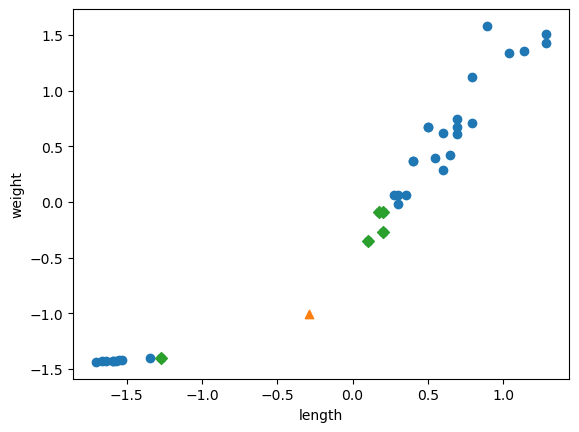

In [80]:
dist, idx = knn.kneighbors(scaled_data)

plt.figure()

plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1])
plt.scatter(scaled_data[0, 0], scaled_data[0, 1], marker = "^")
plt.scatter(scaled_x_train[idx.flatten(), 0], scaled_x_train[idx.flatten(), 1], marker = "D")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()